In [10]:
import json
import matplotlib.pyplot as plt
import numpy as np
%pylab inline
def get_data(data):
    '''
    get the timestamp and 3-component acceleration data. 
    '''
    # read in x, y, z data
    x = np.array(data['data']['x'])
    y = np.array(data['data']['y'])
    z = np.array(data['data']['z'])

    # calculate the timestamp
    # get the start time
    t0 = data['header']['starttime']
    npoints = len(x)
    sampling_rate = data['header']['sampling_rate']
    
    # get the end time 
    t1 = t0 + npoints / sampling_rate
    
    # form the timestamp
    t = np.linspace(t0, t1, npoints)
    
    #trigger time
    triggerTime = data['header']['triggertime']
    startTime   = data['header']['starttime']
    duration = int((triggerTime - startTime) * sampling_rate)
    
    # station latitude and long
    return t, x, y, z, duration

Populating the interactive namespace from numpy and matplotlib


In [11]:
def plot_data(t, x, y, z):
    '''
    helper function to plot the 3-component acceleration data
    '''
    plt.figure()
    plt.subplot(311)
    plt.plot(t, x)
    plt.subplot(312)
    plt.plot(t, y)
    plt.ylabel('Acceleration (g)')
    plt.subplot(313)
    plt.plot(t, z)
    plt.xlabel('Time (sec)')
    plt.show()
    # spectrogram
    plt.figure()
    rate = 25
    timeWindow = 2
    plt.subplot(311)
    specgram(x, NFFT=rate * timeWindow, Fs=rate, noverlap = 5);
    plt.subplot(312)
    specgram(y, NFFT=rate * timeWindow, Fs=rate, noverlap = 5);
    plt.subplot(313)
    specgram(z, NFFT=rate * timeWindow, Fs=rate, noverlap = 5);
    plt.show()
    

False
../../data/Human/356565054647492_1431609944.json
1508


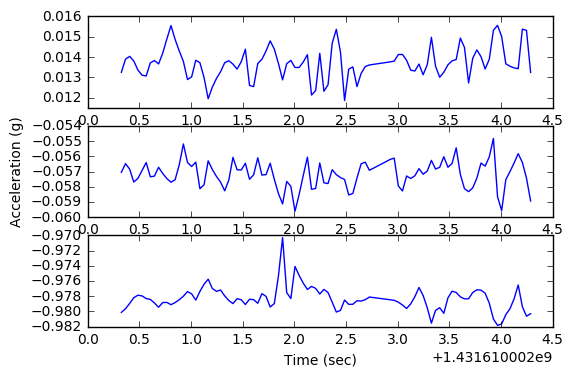

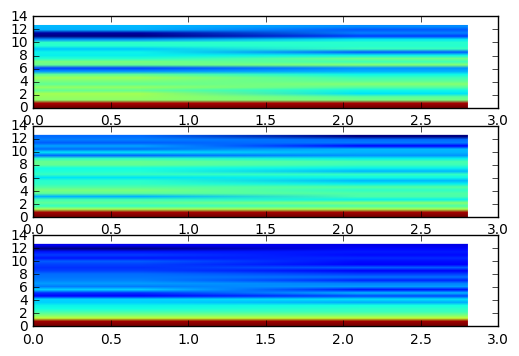

In [18]:
import os
import random
def Sampling(label = None):
    '''
    Draw a sample from data
    
    Args:
    label: boolean, the label of the sample, 1 if shaketable, 0 if human
    
    Returns:
    t     : 1d array, time.
    x     : 1d array, x.
    y     : 1d array, y orthogonal to x.
    z     : 1d array, z (vertical).
    label : boolean.
    '''
    rng = random.Random()
    if label is None:
        label = (rng.random() > 0.5)
    if label:
        path = '../../data/EQ/shake_table/'
    else:
        path = '../../data/Human/'
    files = os.listdir(path)
    oneFile = path + rng.sample(files, 1)[0]
    data = json.load(open(oneFile, 'rb'))
    t, x, y, z, duration = get_data(data)
    return(t, x, y, z, label, oneFile, duration)
t, x, y, z, label, filename, duration = Sampling(False)
print(label)
print(filename)
print(duration)
tmp = range(duration - 50, duration + 50)
#tmp = range(len(x))
plot_data(t[tmp], x[tmp], y[tmp], z[tmp])